# Exploratory Analysis of 911 Call Data

This project focuses on analyzing 911 call data from the Philadelphia to uncover patterns and insights. The dataset, sourced from Kaggle, includes fields such as latitude, longitude, emergency description, and timestamps. A full exhaustive list of features are listed below:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

____
** Import numpy and pandas **

In [2]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 
import chart_studio.plotly as py

** Read in the csv file as a dataframe called df **

In [5]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [8]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [9]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [10]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Let's transform the column by applying lambdas to separate th reason code** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [11]:
def reason_value(string):
    if ":" in string:
        return string[:string.index(":")]

In [12]:
df['reason'] = df['title'].apply(lambda x: reason_value(x))

** What is the most common Reason for a 911 call based off of this new column? **

In [13]:
df['reason'].value_counts()

reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

<Axes: xlabel='reason', ylabel='count'>

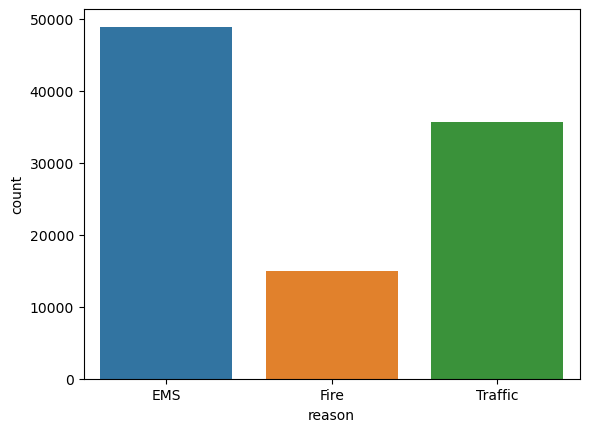

In [14]:
sns.countplot(x='reason', data=df)

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [15]:
type(df['timeStamp'].iloc[0])

str

** These timestamps are still strings. Let's convert the column from strings to DateTime objects. **

In [16]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

time = df['timeStamp'].iloc[0]
time.hour

17

** Now that the column has been turned into DateTime objects, we can now be able to grab specific attributes from the objects themselves. **

In [17]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

df[['Hour', 'Month', 'Day of Week']]

,Hour,Month,Day of Week
0,17,12,3
1,17,12,3
2,17,12,3
3,17,12,3
4,17,12,3
...,...,...,...
99487,11,8,2
99488,11,8,2
99489,11,8,2
99490,11,8,2


** Notice how the Day of Week is an integer 0-6. We will use.map() with this dictionary to map the actual string names to the day of the week: **

In [18]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [19]:
df['Day of Week'] = df['Day of Week'].apply(lambda day: dmap[day])

** Now let's use seaborn to create a countplot of the Day of Week column based off of the Reason column. **

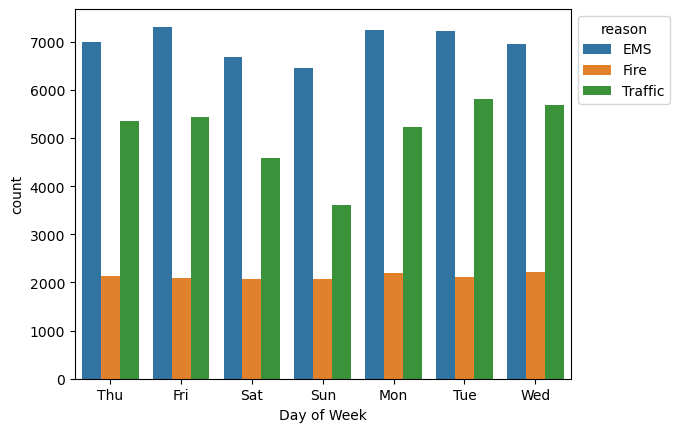

In [20]:
day_countplot = sns.countplot(data=df, x='Day of Week', hue='reason')
sns.move_legend(day_countplot, "upper left", bbox_to_anchor=(1, 1))

**Month:**

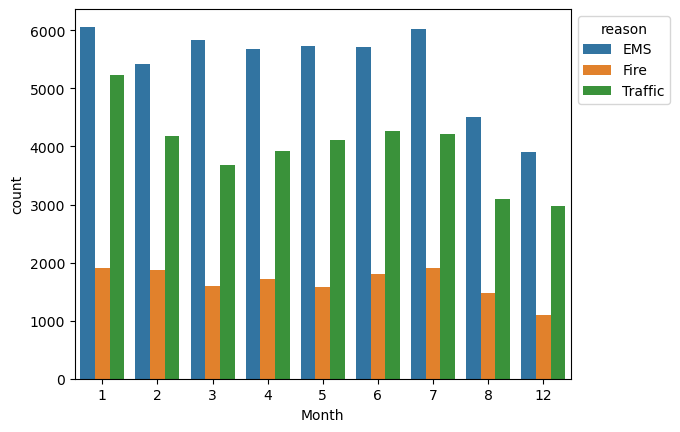

In [21]:
month_countplot = sns.countplot(data=df, x='Month', hue='reason')
sns.move_legend(month_countplot, 'upper left', bbox_to_anchor=(1,1))

** It appears the plot is missing some Months, let's see if we can maybe fill in this information by creating another DataFrame using groupby **

In [25]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now let's create a simple plot off of the dataframe indicating the count of calls per month. **

<Axes: xlabel='Month'>

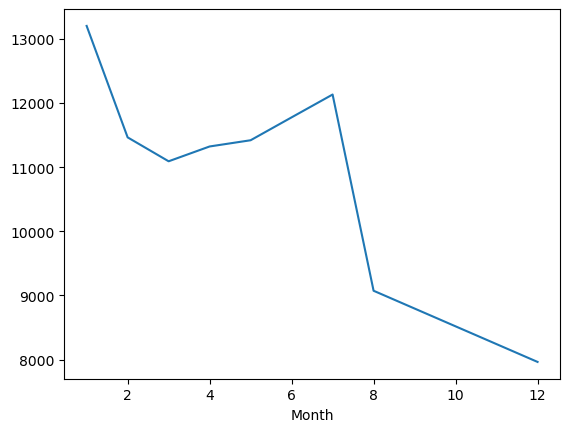

In [26]:
byMonth['twp'].plot()

** Now let's use seaborn to create a linear fit on the number of calls per month. **

C:\Users\jamal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



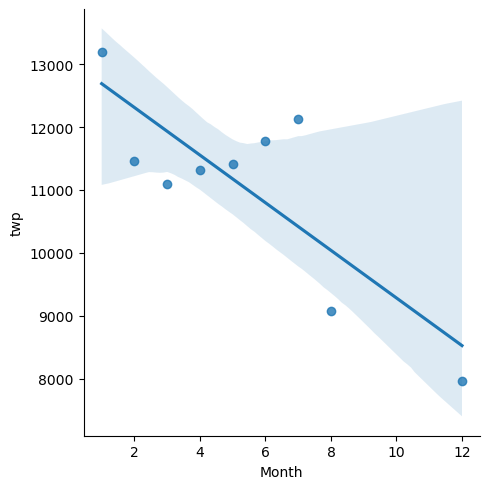

In [27]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

**We will create a new column called 'Date' that contains the date from the timeStamp column. ** 

In [29]:
df['date'] = df['timeStamp'].apply(lambda t: t.date())
df['date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: date, Length: 99492, dtype: object

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

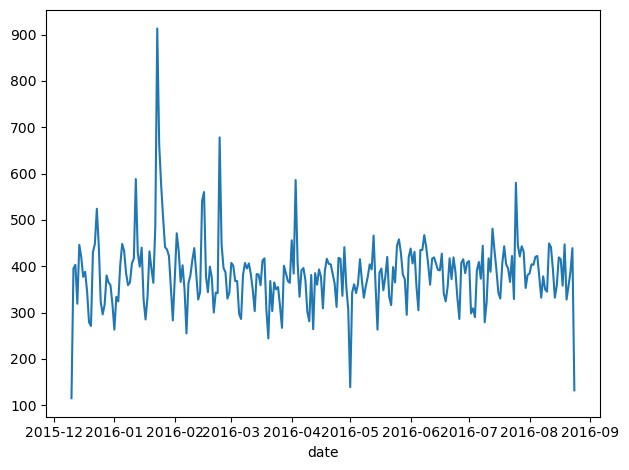

In [36]:
df.groupby('date').count()['twp'].plot()
plt.tight_layout()

** Now let's recreate this plot but with 3 separate plots with each plot representing a Reason for the 911 call**

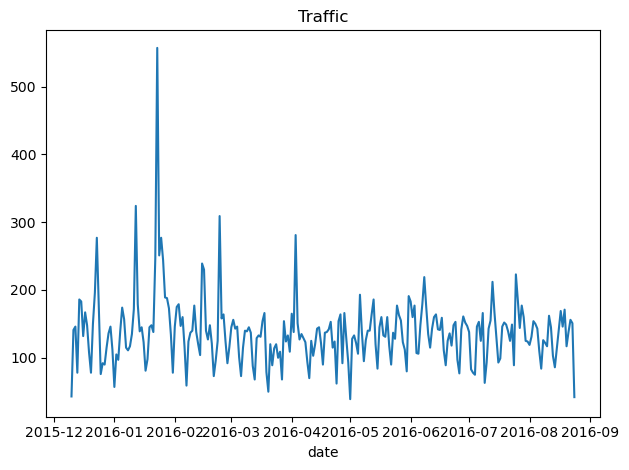

In [37]:
df[df['reason'] == 'Traffic'].groupby('date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

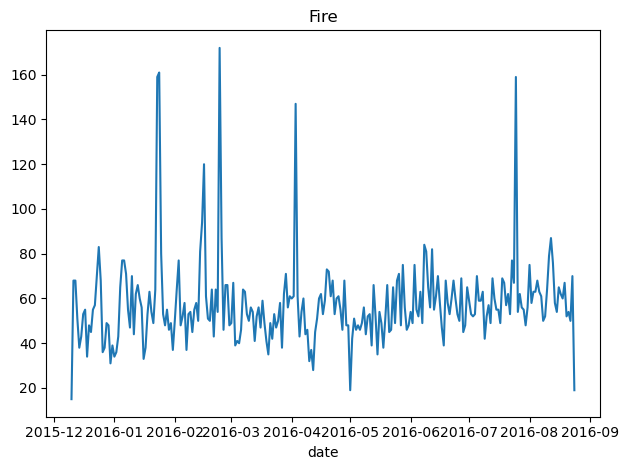

In [35]:
df[df['reason'] == 'Fire'].groupby('date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

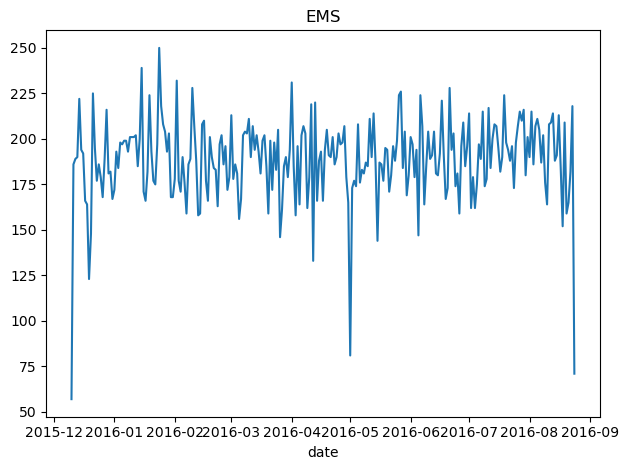

In [34]:
df[df['reason'] == 'EMS'].groupby('date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. Combining groupby with an unstack method offers a practical approach to restructuring the dataframe for heatmap creation.**

In [39]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** This creates a HeatMap using this new DataFrame. **

<Axes: xlabel='Hour', ylabel='Day of Week'>

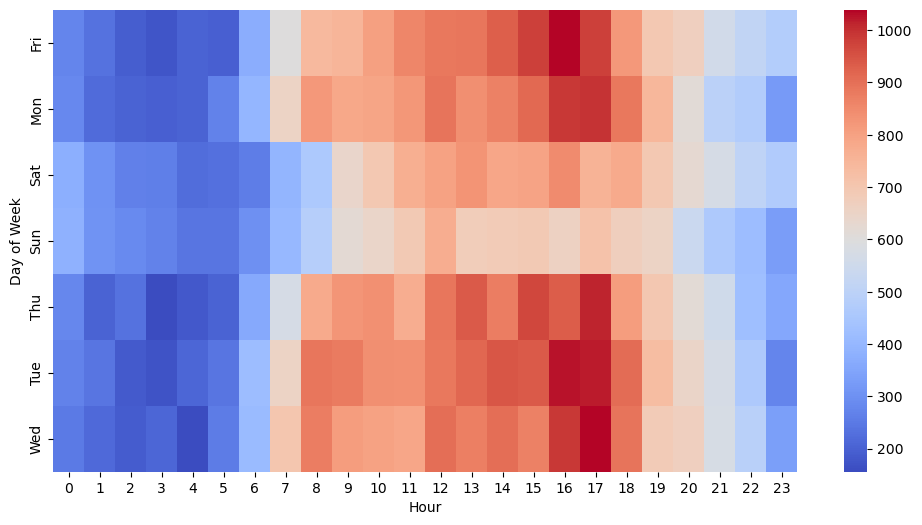

In [42]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='coolwarm')

** This creates a clustermap using this DataFrame. **

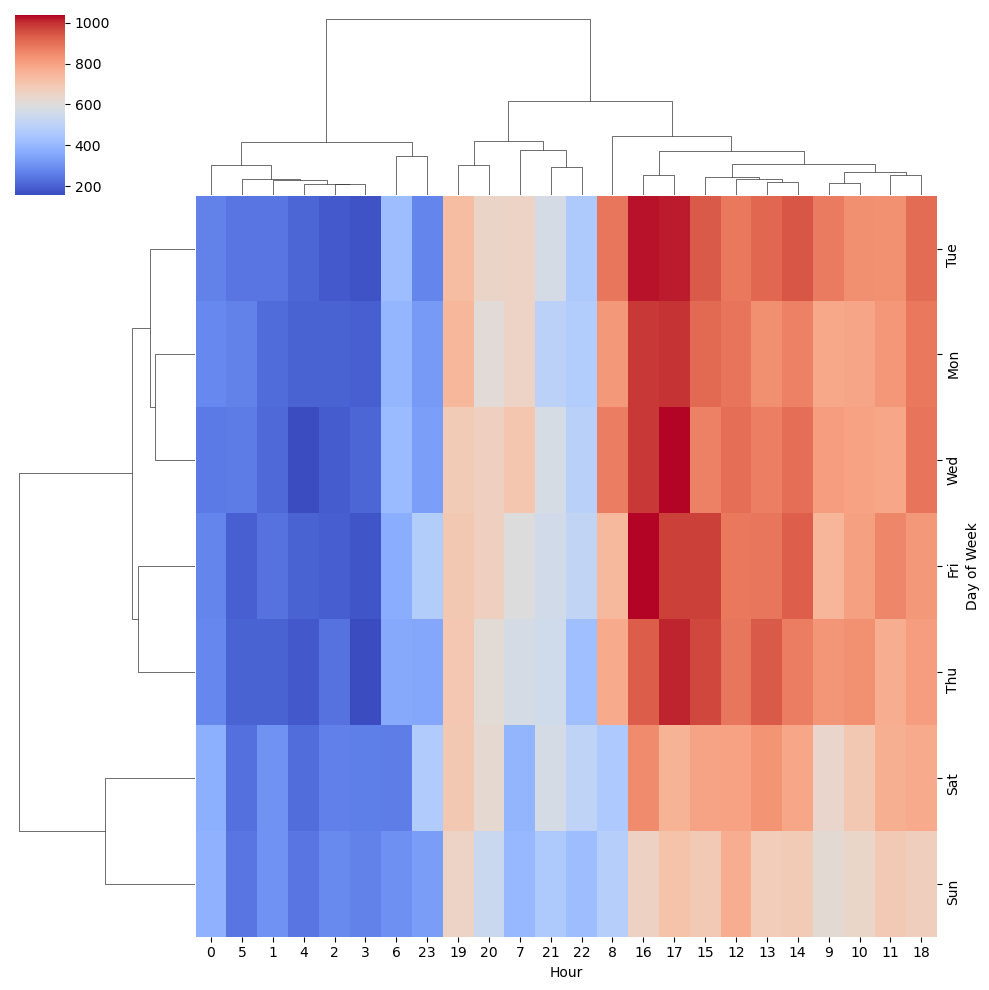

In [43]:
sns.clustermap(dayHour, cmap='coolwarm')

** Now I'll repeat using 'Month' instead**

In [44]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<Axes: xlabel='Month', ylabel='Day of Week'>

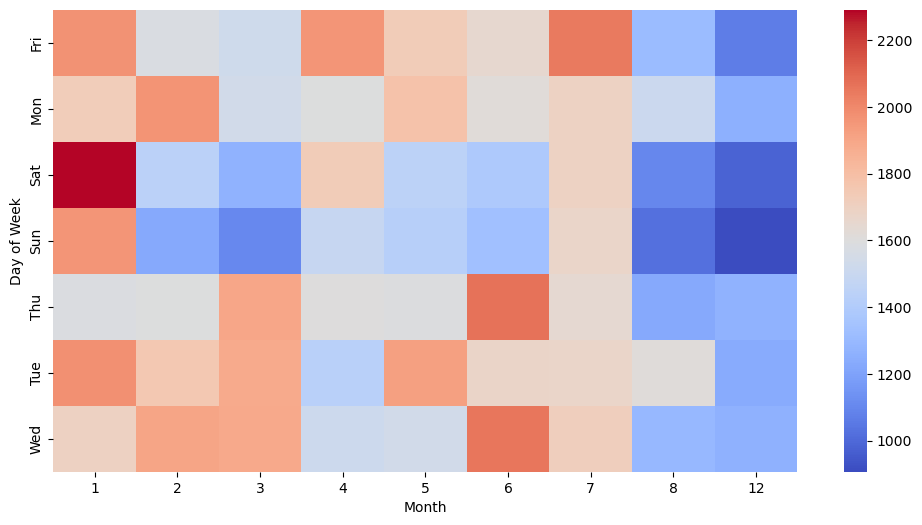

In [48]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='coolwarm')

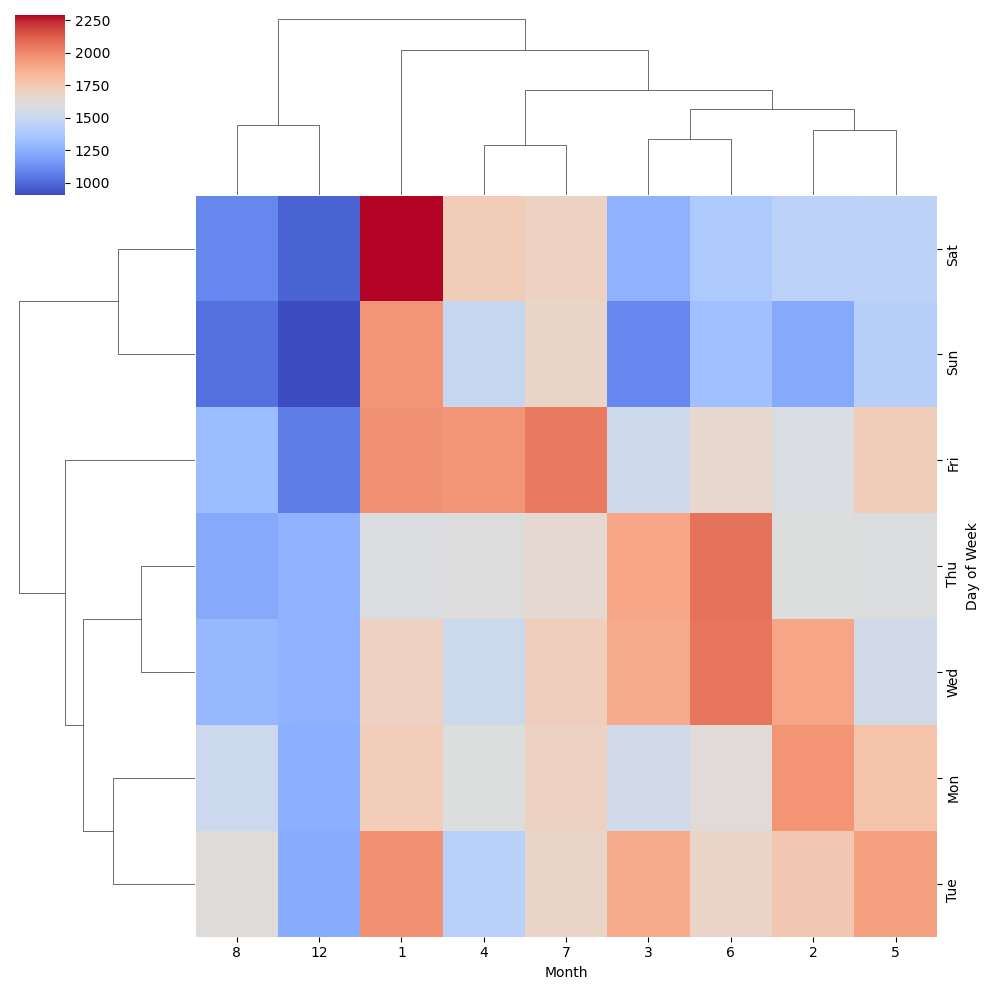

In [47]:
sns.clustermap(dayMonth,cmap='coolwarm')

** Since we have access to geospatial data, we can take advantage of this by using a geospatial library to visualize the 911 calls. This provides a clear view of areas that have a higher amount of calls. **

In [57]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap

# Convert the DataFrame to a GeoDataFrame using the long and lang 
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lng, df.lat))

# Create a basic map centered around the mean latitude and longitude
map_center = [gdf.geometry.y.mean(), gdf.geometry.x.mean()]
map = folium.Map(location=map_center, zoom_start=12)

# Add a heatmap to the map
# Extract latitude and longitude from the 'geometry' column
heatmap_data = [[point.xy[1][0], point.xy[0][0]] for point in gdf.geometry]
gradient = {0.2: 'blue', 0.4: 'cyan', 0.6: 'lime', 0.8: 'yellow', 1: 'red'}
HeatMap(heatmap_data, radius=10, gradient=gradient).add_to(map)

map